<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Time-Series-Forecasting-with-the-Long-Short-Term-Memory-Network-in-Python" data-toc-modified-id="Time-Series-Forecasting-with-the-Long-Short-Term-Memory-Network-in-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time Series Forecasting with the Long Short-Term Memory Network in Python</a></span><ul class="toc-item"><li><span><a href="#Shampoo-Sales-Dataset" data-toc-modified-id="Shampoo-Sales-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><a href="https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period" target="_blank">Shampoo Sales Dataset</a></a></span></li></ul></li><li><span><a href="#Experimental-Test-Setup" data-toc-modified-id="Experimental-Test-Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experimental Test Setup</a></span></li></ul></div>

This notebook originally appeared as a [post](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/) on the [blog Machine Learning Mastery](https://machinelearningmastery.com/blog/).

# Time Series Forecasting with the Long Short-Term Memory Network in Python

The Long Short-Term Memory recurrent Neural Network has the promise of learning long sequences of observations.

It seems a perfect match for time series forecasting, and in fact, it may be.

In this notebook, we will discover how to develop an LSTM forecast model for a one-step univariate time series forecasting problem.

## [Shampoo Sales Dataset](https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period)

This dataset describes the monthly number of sales of shampoo over a 3-year period.

The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright, and Hyndman (1998).

In [2]:
# Jupyter notebook plotting setup & imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd


In [18]:
# load and plot dataset
def parser(x):
    return pd.datetime.strptime('190' + x, '%Y-%m')


series = pd.read_csv('datasets/sales-of-shampoo-over-a-three-ye.csv', nrows=36, header=0,
                     parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [19]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [20]:
series.tail()

Month
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales of shampoo over a three year period, dtype: float64

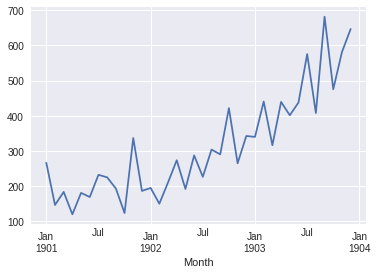

In [21]:
series.plot()

# Experimental Test Setup

We will split the shampoo sales dataset into two parts:
 - a training and
 - a test set
 
The first two years of data will be taken for the training dataset and the remaining one year will be used for the test set:

In [29]:
# split data into train and test
X = series.values
train, test = X[:12], X[12:]

Models will be developed using the training dataset and will make predictions on the test dataset.